In [1]:
import sys
sys.path.append('/workspace/attacker_train/')

import torch
import torch.nn.functional as F
import torch.optim as optim

# Import File_Manager
from ModelFileManagement.MNIST_FileManage import MNISTFileManagement
from ModelFileManagement.MedMNIST_FileManage import MedMNISTFileManagement
from ModelFileManagement.FashionMNIST_FileManage import FashionMNISTFileManagement
# Impoer Atk_Module
import MakeAtkData
import Atk_Train

import matplotlib.pyplot as plt
import torchvision.transforms as transforms

import os
from pathlib import Path

import pandas as pd
import network
from torchvision.utils import make_grid

import numpy as np
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


==============================================精度表＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

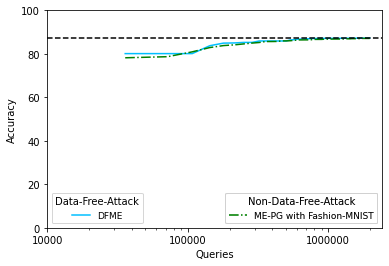

In [2]:
max_acc = []
model_type = "FashionMNIST"
max_path = []
# MNIST_PATH
# max_path.append(os.path.join("/workspace/DFME_log", model_type,"NOG_load/NOS_load/MNIST", "0.08", "1", "0.05", "5", "0.3","accuracy.csv"))
# max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/MNIST", "0.0001", "1", "0.08", "5", "0.3","accuracy.csv"))

# Fashion_PATH
max_path.append(os.path.join("/workspace/DFME_log", model_type,"NOG_load/NOS_load/FashionMNIST", "0.0001", "1", "0.05", "5", "0.3","accuracy.csv"))
max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/FashionMNIST", "0.08", "1", "0.01", "5", "0.5","accuracy.csv"))

MAXaccuracy = []
for i, path in enumerate(max_path):
        df = pd.read_csv(path)
        
        # 特定の列から最大の値を取得
        max_val_in_file = df.iloc[:, 1].max()
        max_acc.append(max_val_in_file)
        # 右側の数値の列を取得します（ここでは2列目を取得）
        values = df.iloc[:, 1]
        # epochとaccuracyを抽出
        MAXaccuracy.append(values)

# 一つ目のプロット
plt.xscale("log")

lines = []  # lineオブジェクトを格納するリスト
x_values1 = [i*36 + 36 for i in range(55)]
# 色のリストを作成'orange',
colors = ['deepskyblue', 'green', 'red', 'purple', 'saddlebrown']
# データをループでプロット
for i, dataset in enumerate(MAXaccuracy):
    if i==1:
        line, = plt.plot(x_values1, dataset, color=colors[i], linestyle='-.')
        lines.append(line)
    else:     
        line, = plt.plot(x_values1, dataset, color=colors[i])
        lines.append(line)

# y軸に水平線を引く
plt.axhline(y=87.51 , color='black', linestyle='--') # Mnist: 98.1 FashionMNIST: 87.51 MedMNIST: 95.6247 

plt.xlabel('Queries')
plt.ylabel('Accuracy')
plt.gca().set_xticks([10, 100, 1000])
plt.gca().set_xticklabels([10**4, 10**5, 10**6])

# 凡例を作成
labels = ["DFME", "ME-PG with Fashion-MNIST"]
# 凡例を追加
legend_p1 = plt.legend([lines[0]], [labels[0]], loc="lower left", title="Data-Free-Attack", fontsize=9)
legend_p2 = plt.legend([lines[1]], [labels[1]], loc="lower right", title="Non-Data-Free-Attack", fontsize=9)
# 1つ目の凡例を表示
plt.gca().add_artist(legend_p1)
# 2つ目の凡例を表示
plt.gca().add_artist(legend_p2)
plt.ylim(0, 100)
plt.show()


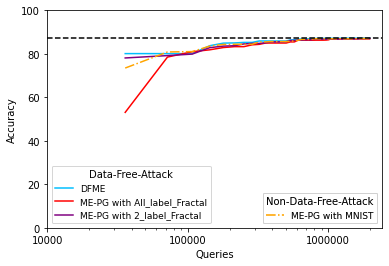

In [3]:
max_acc = []
model_type = "FashionMNIST"
max_path = []
# MNIST_PATH
# max_path.append(os.path.join("/workspace/DFME_log", model_type,"NOG_load/NOS_load/MNIST", "0.08", "1", "0.05", "5", "0.3","accuracy.csv"))
# max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/Fractal", "0.0005", "1", "0.08", "5", "0.3","accuracy.csv"))
# max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/LDFractal", "0.001", "1", "0.05", "5", "0.5","accuracy.csv"))
# max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/FashionMNIST", "0.001", "1", "0.05", "5", "0.5","accuracy.csv"))

# Fashion_PATH
max_path.append(os.path.join("/workspace/DFME_log", model_type,"NOG_load/NOS_load/FashionMNIST", "0.0001", "1", "0.05", "5", "0.3","accuracy.csv"))
max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/Fractal", "0.005", "1", "0.01", "5", "0.7","accuracy.csv"))
max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/LDFractal", "0.008", "1", "0.008", "5", "0.5","accuracy.csv"))
max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/MNIST", "0.008", "1", "0.008", "5", "0.7","accuracy.csv"))

MAXaccuracy = []
SUM = []
for i, path in enumerate(max_path):
        df = pd.read_csv(path)
        
        # 特定の列から最大の値を取得
        max_val_in_file = df.iloc[:, 1].max()
        max_acc.append(max_val_in_file)
        # 右側の数値の列を取得します（ここでは2列目を取得）
        values = df.iloc[:, 1]
        # epochとaccuracyを抽出
        MAXaccuracy.append(values)
        Sum_values = df.iloc[:, 1].sum()
        SUM.append(Sum_values)

# 一つ目のプロット
plt.xscale("log")

lines = []  # lineオブジェクトを格納するリスト
x_values1 = [i*36 + 36 for i in range(55)]
# 色のリストを作成
colors = ['deepskyblue','red','purple', 'orange', 'green', 'saddlebrown']
# データをループでプロット
for i, dataset in enumerate(MAXaccuracy):
    if i==3:
        line, = plt.plot(x_values1, dataset, color=colors[i], linestyle='-.')
        lines.append(line)
    else:     
        line, = plt.plot(x_values1, dataset, color=colors[i])
        lines.append(line)

# y軸に水平線を引く
plt.axhline(y=87.51 , color='black', linestyle='--') # Mnist: 98.1 FashionMNIST: 87.51 OrganAMNIST: 95.6247　OCTMNIST:87.51 

plt.xlabel('Queries')
plt.ylabel('Accuracy')
plt.gca().set_xticks([10, 100, 1000])
plt.gca().set_xticklabels([10**4, 10**5, 10**6])

# 凡例を作成 
labels = ["DFME","ME-PG with All_label_Fractal", "ME-PG with 2_label_Fractal",  "ME-PG with MNIST"]
legend_p1 = plt.legend(lines[0:3], labels[0:3], ncol = 1,loc="lower left", title="Data-Free-Attack", fontsize=9)
ax = plt.gca().add_artist(legend_p1)
legend_p2 = plt.legend(lines[3:4], labels[3:4], ncol = 1,loc="lower right", title="Non-Data-Free-Attack", fontsize=9)
ax = plt.gca().add_artist(legend_p2)
plt.ylim(0, 100)
plt.savefig('Med_Fashion_3.pdf', bbox_inches='tight')

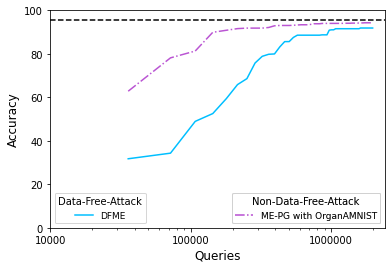

In [4]:
max_acc = []
model_type = "New_MedMNIST(Organ)"
max_path = []
# OCTMNIST_PATH
# max_path.append(os.path.join("/workspace/DFME_log", model_type,"NOG_load/NOS_load/OCTMNIST", "0.005", "1", "0.008", "5", "0.5","accuracy.csv"))
# max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/OCTMNIST", "0.08", "1", "0.01", "5", "0.3","accuracy.csv"))

# OrganAMNIST_PATH
max_path.append(os.path.join("/workspace/DFME_log", model_type,"NOG_load/NOS_load/MedMNIST", "0.0001", "1", "0.008", "5", "0.7","accuracy.csv"))
max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/MedMNIST", "0.0001", "1", "0.05", "5", "0.3","accuracy.csv"))


MAXaccuracy = []
for i, path in enumerate(max_path):
        df = pd.read_csv(path)
        
        # 特定の列から最大の値を取得
        max_val_in_file = df.iloc[:, 1].max()
        max_acc.append(max_val_in_file)
        # 右側の数値の列を取得します（ここでは2列目を取得）
        values = df.iloc[:, 1]
        # epochとaccuracyを抽出
        MAXaccuracy.append(values)

# 一つ目のプロット
plt.xscale("log")

lines = []  # lineオブジェクトを格納するリスト
x_values1 = [i*36 + 36 for i in range(55)]
# 色のリストを作成, , 'orange', 'green',  'red','purple'
colors = ['deepskyblue', 'mediumorchid']

# データをループでプロット
for i, dataset in enumerate(MAXaccuracy):
    if i == 1:
        line, = plt.plot(x_values1, dataset, color=colors[i], linestyle='-.')    
    else:
        line, = plt.plot(x_values1, dataset, color=colors[i])
    lines.append(line)

# y軸に水平線を引く
plt.axhline(y=95.6247 , color='black', linestyle='--') # Mnist: 98.1 FashionMNIST: 87.51 MedMNIST: 95.6247 81.9

plt.xlabel('Queries',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.gca().set_xticks([10, 100, 1000])
plt.gca().set_xticklabels([10**4, 10**5, 10**6])

labels = ["DFME", "ME-PG with OrganAMNIST"]
# 凡例を追加
legend_p1 = plt.legend([lines[0]], [labels[0]], loc="lower left", title="Data-Free-Attack", fontsize=9)
legend_p2 = plt.legend([lines[1]], [labels[1]], loc="lower right", title="Non-Data-Free-Attack", fontsize=9)
# 1つ目の凡例を表示
plt.gca().add_artist(legend_p1)
# 2つ目の凡例を表示
plt.gca().add_artist(legend_p2)
plt.ylim(0, 100)

plt.savefig('Med_Organ_3.pdf', bbox_inches='tight')
plt.show()

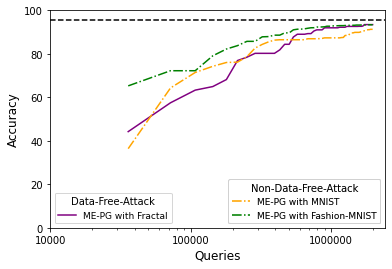

<Figure size 432x288 with 0 Axes>

In [5]:
max_acc = []
model_type = "New_MedMNIST(Organ)"
max_path = []
# OCTMNIST_PATH
# max_path.append(os.path.join("/workspace/DFME_log", model_type,"NOG_load/NOS_load/OCTMNIST", "0.005", "1", "0.008", "5", "0.5","accuracy.csv"))
# max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/Fractal",  "0.008", "1", "0.01", "5", "0.5","accuracy.csv"))
# max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/LDFractal", "0.005", "1", "0.005", "5", "0.5","accuracy.csv"))
# max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/MNIST", "0.008", "1", "0.008", "5", "0.7","accuracy.csv"))
# max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/FashionMNIST", "0.005", "1", "0.005", "5", "0.7","accuracy.csv"))
# max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/OCTMNIST", "0.08", "1", "0.01", "5", "0.3","accuracy.csv"))

# OrganAMNIST_PATH
# max_path.append(os.path.join("/workspace/DFME_log", model_type,"NOG_load/NOS_load/MedMNIST", "0.0001", "1", "0.008", "5", "0.7","accuracy.csv"))
# max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/Fractal", "0.008", "1", "0.008", "5", "0.7","accuracy.csv"))
max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/LDFractal", "0.0001", "1", "0.05", "5", "0.5","accuracy.csv"))
max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/MNIST", "0.008", "1", "0.01", "5", "0.5","accuracy.csv"))
max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/FashionMNIST", "0.0001", "1", "0.05", "5", "0.3","accuracy.csv"))
# max_path.append(os.path.join("/workspace/DFME_log", model_type,"G_load/NOS_load/MedMNIST", "0.0001", "1", "0.05", "5", "0.3","accuracy.csv"))


MAXaccuracy = []
SUM = []
for i, path in enumerate(max_path):
        df = pd.read_csv(path)
        
        # 特定の列から最大の値を取得
        max_val_in_file = df.iloc[:, 1].max()
        max_acc.append(max_val_in_file)
        # 右側の数値の列を取得します（ここでは2列目を取得）
        values = df.iloc[:, 1]
        # epochとaccuracyを抽出
        MAXaccuracy.append(values)
        Sum_values = df.iloc[:, 1].sum()
        SUM.append(Sum_values)

# 一つ目のプロット
plt.xscale("log")

lines = []  # lineオブジェクトを格納するリスト
x_values1 = [i*36 + 36 for i in range(55)]
# 色のリストを作成
colors = ['purple', 'orange', 'green']

# データをループでプロット
for i, dataset in enumerate(MAXaccuracy):
    if i == 1 or i == 2:
        line, = plt.plot(x_values1, dataset, color=colors[i], linestyle='-.')    
    else:
        line, = plt.plot(x_values1, dataset, color=colors[i])
    lines.append(line)

# y軸に水平線を引く
plt.axhline(y=95.6247 , color='black', linestyle='--') # Mnist: 98.1 FashionMNIST: 87.51 OrganAMNIST: 95.6247 OCTMNIST: 81.9

plt.xlabel('Queries',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.gca().set_xticks([10, 100, 1000])
plt.gca().set_xticklabels([10**4, 10**5, 10**6])

labels = ["ME-PG with Fractal","ME-PG with MNIST", "ME-PG with Fashion-MNIST"]
legend_p1 = plt.legend(lines[0:1], labels[0:1], ncol = 1,loc="lower left", title="Data-Free-Attack", fontsize=9)
ax = plt.gca().add_artist(legend_p1)
legend_p2 = plt.legend(lines[1:3], labels[1:3], ncol = 1,loc="lower right", title="Non-Data-Free-Attack", fontsize=9)
ax = plt.gca().add_artist(legend_p2)
plt.ylim(0, 100)
plt.show()
plt.savefig('Med_Organ_last.pdf', bbox_inches='tight')

In [59]:
difference_acc = []
Vic = 87.51
for i in range(len(SUM)):
    difference_acc.append(((SUM[i])/55)/Vic)
print(difference_acc)

[0.9872035403746061, 0.9745275864576517, 0.9819137553110813, 0.9831063462876973, 0.983077258702902]


In [17]:
# 空のデータフレームを作成
combined_df1 = pd.DataFrame()
combined_df2 = pd.DataFrame()
combined_df3 = pd.DataFrame()

model_type = "FashionMNIST"
Base_path = "/workspace/DFME_log"
Target_path = "FashionMNIST"
detail_path1 = ["0.08", "0.008", "0.005", "0.001", "0.0005", "0.0001"]
detail_path2 = ["0.08", "0.05", "0.01", "0.008", "0.005", "0.001"]
detail_path3 = "0.3"

max_acc = []
DFMEaccuracy = []
DFME_SUM = []

for i, D_path1 in enumerate(detail_path1):
    for j, D_path2 in enumerate(detail_path2):
        path = os.path.join(Base_path, model_type,"NOG_load/NOS_load",Target_path, D_path1, "1", D_path2, "5",detail_path3)        
        fullpath = os.path.join(path,"accuracy.csv")
        df = pd.read_csv(fullpath)
        
        # 特定の列から最大の値を取得
        max_val_in_file = df.iloc[:, 1].max()
        max_acc.append(max_val_in_file)

        # 右側の数値の列を取得します（ここでは2列目を取得）
        values = df.iloc[:, 1]
        # epochとaccuracyを抽出
        DFMEaccuracy.append(values)
        
        Sum_values = df.iloc[:, 1].sum()
        DFME_SUM.append(Sum_values)



In [18]:
difference_acc = []
for i in range(len(DFME_SUM)):
    difference_acc.append(((DFME_SUM[i])/55)/87.51)

In [19]:
min_index = np.argmax(difference_acc)
print(min_index,"\n",difference_acc[min_index])

31 
 0.9872035403746061


<AxesSubplot:>

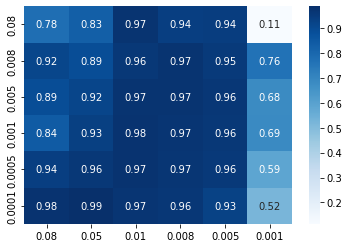

In [20]:
import seaborn as sns
# データを正規化 (0から1の範囲にスケーリング)
normalized_data = (np.array(difference_acc) / (98.1*55))
difference_acc = np.array(difference_acc)

# データを2Dの行列に変換 (例: 4x4行列)
matrix_data = difference_acc.reshape(6, 6)

# Seabornのヒートマップを作成
sns.heatmap(matrix_data, cmap='Blues', annot=True, fmt=".2f", xticklabels=["0.08", "0.05", "0.01", "0.008", "0.005", "0.001"], yticklabels= ["0.08", "0.008", "0.005", "0.001", "0.0005", "0.0001"])